<a href="https://colab.research.google.com/github/fuelunit/Brembo_Regression/blob/main/Liu_Yipeng_TECH176_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Requirements:
#   For regression problems
#     Linear Reg
#     Polynomial Reg (with different degrees)
#     ElasticNet (in case of overfitting problem)
#     SVM (Linear and Poly)
#     Decision Trees
#     Random Forest
#   RMSE
#     Make a table for all rmse
#   Feature importance
#   Min max for mu
# Presentation
#   Fonts, color, size, graph, table
#
# Due to the resource constraints, the whole dataset needs to be shrinked down.
# Read CSV
import pandas as pd
URL = 'https://drive.google.com/uc?export=download&id=1pRTv5xSsumywfCXu8NH9IV7qps1CTCkG&confirm=t&uuid=8eb4a00b-9a4f-45fb-843f-314e5ee37ca8&at=AB6BwCDTeuPThMnpIPDx3Y_gJct4:1699305833187'
bp_recipe_dataframe = pd.read_csv(URL)

In [ ]:
bp_recipe_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295428 entries, 0 to 1295427
Data columns (total 69 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   time_index    1295428 non-null  int64  
 1   compound_id   1295428 non-null  object 
 2   step          1295428 non-null  object 
 3   braking_id    1295428 non-null  object 
 4   time          1295428 non-null  float64
 5   pressure_bar  1295428 non-null  float64
 6   temp_c        1295428 non-null  float64
 7   speed_kph     1295428 non-null  float64
 8   mu            1295428 non-null  float64
 9   A_1           1295428 non-null  float64
 10  C_1           1295428 non-null  float64
 11  B_1           1295428 non-null  float64
 12  C_2           1295428 non-null  float64
 13  F_1           1295428 non-null  float64
 14  B_2           1295428 non-null  float64
 15  E_1           1295428 non-null  float64
 16  B_3           1295428 non-null  float64
 17  B_4           1295428 non-n

In [ ]:
bp_recipe_dataframe.head()

,time_index,compound_id,step,braking_id,time,pressure_bar,temp_c,speed_kph,mu,A_1,...,E_9,F_11,F_12,E_10,B_22,D_1,E_11,B_23,B_24,A_6
0,1,17937-100,Burnishing 1,burnishing_1_1,0.865,8.553661,27.041474,73.433579,0.516617,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,8.0,0.0,5.0
1,2,17937-100,Burnishing 1,burnishing_1_1,0.955,8.674764,27.560890,72.141032,0.523087,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,8.0,0.0,5.0
2,3,17937-100,Burnishing 1,burnishing_1_1,1.045,8.541551,27.927537,70.848485,0.536882,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,8.0,0.0,5.0
3,4,17937-100,Burnishing 1,burnishing_1_1,1.135,8.571827,28.721938,69.580098,0.553362,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,8.0,0.0,5.0
4,5,17937-100,Burnishing 1,burnishing_1_1,1.225,8.426504,29.394123,68.311711,0.556536,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,8.0,0.0,5.0


In [ ]:
# check the correlations
bp_recipe_dataframe.corr()['mu'].sort_values(ascending = False)

<ipython-input-71-570067d01366>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bp_recipe_dataframe.corr()['mu'].sort_values(ascending = False)


mu              1.000000
time_index      0.268850
time            0.176200
C_6             0.156034
B_7             0.142460
                  ...   
A_1            -0.121904
B_19           -0.124114
E_7            -0.130774
F_10           -0.167885
pressure_bar   -0.566531
Name: mu, Length: 66, dtype: float64

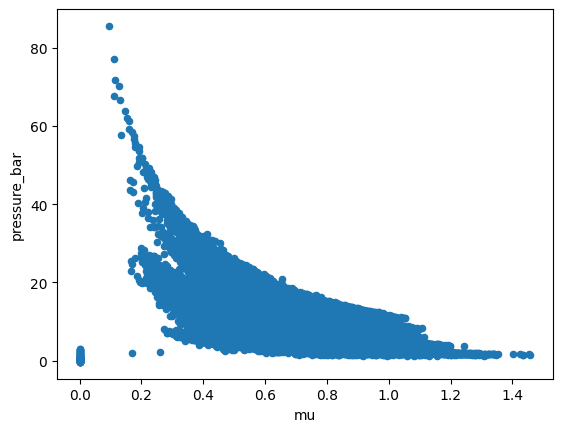

In [ ]:
# Visualize mu vs pressure through a scatter plot
bp_recipe_dataframe.plot(
    kind="scatter",
    x="mu",
    y="pressure_bar"
    ).get_figure().savefig('mu_p_scatter.png')

In [ ]:
# Dropping time_index because of redundant time feature
bp_recipe_dataframe = bp_recipe_dataframe.drop('time_index', axis = 1)


In [ ]:
# Dropping compound_id
bp_recipe_dataframe = bp_recipe_dataframe.drop('compound_id', axis = 1)

In [ ]:
# Dropping step feature due to redundancy provided by braking_id
bp_recipe_dataframe = bp_recipe_dataframe.drop('step', axis = 1)

In [ ]:
# In attempt to isolate the effects from pressure applied, we are
# dropping pressure_bar
bp_recipe_dataframe = bp_recipe_dataframe.drop('pressure_bar', axis = 1)

In [ ]:
# dropping time
bp_recipe_dataframe = bp_recipe_dataframe.drop('time', axis = 1)

In [ ]:
# Check the feature and output (mu) columns
bp_recipe_dataframe.columns

Index(['braking_id', 'temp_c', 'speed_kph', 'mu', 'A_1', 'C_1', 'B_1', 'C_2',
       'F_1', 'B_2', 'E_1', 'B_3', 'B_4', 'F_2', 'F_3', 'B_5', 'C_3', 'F_4',
       'F_5', 'B_6', 'B_7', 'B_8', 'A_2', 'A_3', 'B_9', 'B_10', 'C_4', 'B_11',
       'B_12', 'E_2', 'E_3', 'E_4', 'C_5', 'B_13', 'F_6', 'C_6', 'B_14',
       'B_15', 'E_5', 'B_16', 'A_4', 'F_7', 'F_8', 'E_6', 'E_7', 'B_17',
       'B_18', 'B_19', 'E_8', 'F_9', 'B_20', 'F_10', 'B_21', 'A_5', 'E_9',
       'F_11', 'F_12', 'E_10', 'B_22', 'D_1', 'E_11', 'B_23', 'B_24', 'A_6'],
      dtype='object')

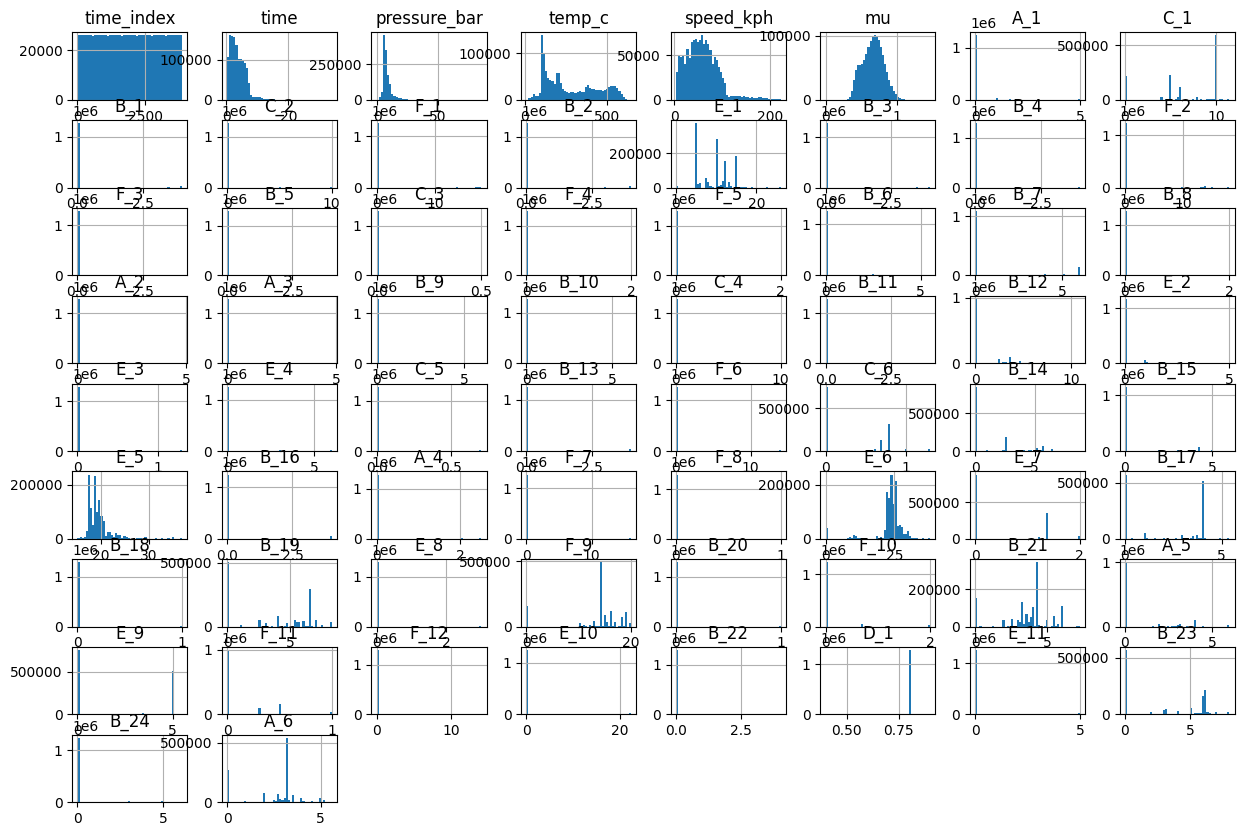

In [ ]:
import matplotlib.pyplot as plt
bp_recipe_dataframe.hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
# check the correlations again
bp_recipe_dataframe.corr()['mu'].sort_values(ascending = False)

<ipython-input-11-570067d01366>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bp_recipe_dataframe.corr()['mu'].sort_values(ascending = False)


mu      1.000000
C_6     0.156034
B_7     0.142460
A_5     0.106827
F_11    0.101603
          ...   
E_5    -0.114177
A_1    -0.121904
B_19   -0.124114
E_7    -0.130774
F_10   -0.167885
Name: mu, Length: 63, dtype: float64

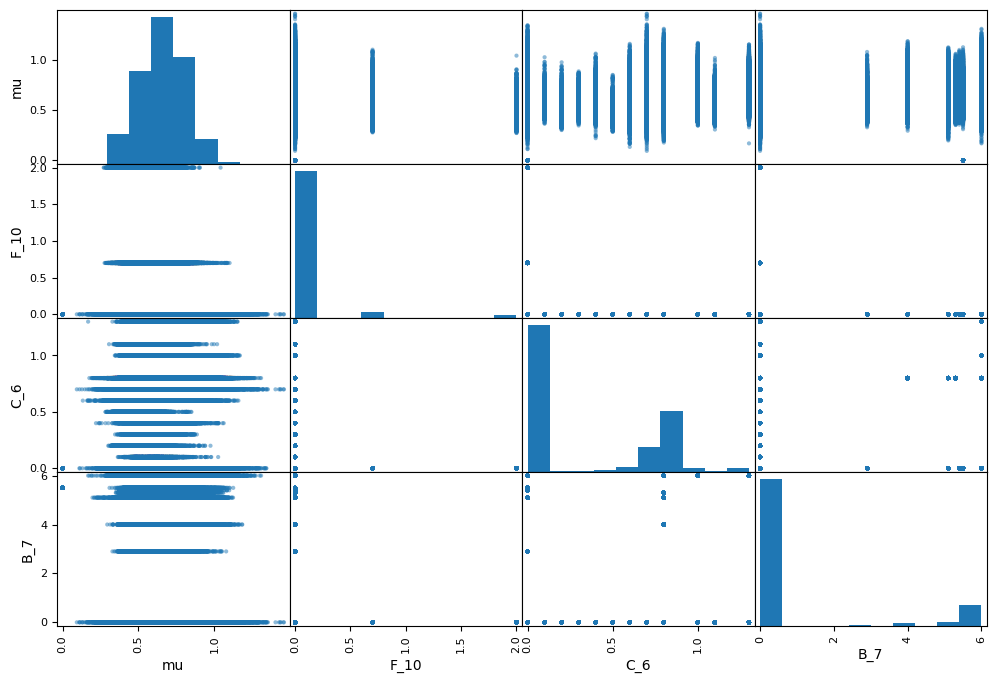

In [ ]:
# Visualize correlations
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ['mu', 'F_10', 'C_6', 'B_7']
scatter_matrix(bp_recipe_dataframe[attributes], figsize=(12, 8))
plt.show()

In [ ]:
# Calling the describe() method to get the min, max, and median of mu
bp_recipe_dataframe['mu'].describe()

count    1.295428e+06
mean     6.593667e-01
std      1.453174e-01
min      0.000000e+00
25%      5.543382e-01
50%      6.652547e-01
75%      7.623117e-01
max      1.458443e+00
Name: mu, dtype: float64

In [ ]:
# mu cannot be 0
zero_mu_idx = bp_recipe_dataframe.query('mu == 0').index
bp_recipe_dataframe = bp_recipe_dataframe.drop(zero_mu_idx, axis = 0).copy()
# reset index for the stratified shuffle split to work properly
bp_recipe_dataframe = bp_recipe_dataframe.reset_index()

In [ ]:
# Verify with describe method
bp_recipe_dataframe['mu'].describe()

count    1.295273e+06
mean     6.594456e-01
std      1.451470e-01
min      9.387494e-02
25%      5.543708e-01
50%      6.652791e-01
75%      7.623280e-01
max      1.458443e+00
Name: mu, dtype: float64

In [ ]:
# StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
# Initialize constants
TRAIN_SIZE = 0.0025
TEST_SIZE_PERCENTAGE = 0.1
# Initialize the counter which specifies the index of file output pairs
counter = 0
for train_index, test_index in StratifiedShuffleSplit(
            n_splits = 1,
            test_size = TRAIN_SIZE * TEST_SIZE_PERCENTAGE,
            train_size = TRAIN_SIZE,
            random_state = 42
        ).split(
            bp_recipe_dataframe,
            bp_recipe_dataframe['braking_id']
        ):
    train_out_file = 'stratified_train_' + str(counter) + '.csv'
    test_out_file = 'stratified_test_' + str(counter) + '.csv'
    bp_recipe_dataframe.loc[train_index].to_csv(path_or_buf = train_out_file)
    bp_recipe_dataframe.loc[test_index].to_csv(path_or_buf = test_out_file)
    # Increment counter
    counter += 1


In [ ]:
# Initialize train_set and test_set from the stratified list
import pandas as pd

stratifie_train_url = 'https://drive.google.com/uc?id=1wkpSdYMAUq-uudK5ShM9noVVZ6LKJrqp'
stratifie_test_url = 'https://drive.google.com/uc?id=1c1h7qGF6d5OX8lcgxJTSRRFNO7ie0pcc'
train_set = pd.read_csv(stratifie_train_url)
test_set = pd.read_csv(stratifie_test_url)
print("train_set.shape =", train_set.shape)
print("test_set.shape  = ", test_set.shape)

train_set.shape = (3238, 66)
test_set.shape  =  (324, 66)


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238 entries, 0 to 3237
Data columns (total 66 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3238 non-null   int64  
 1   index       3238 non-null   int64  
 2   braking_id  3238 non-null   object 
 3   temp_c      3238 non-null   float64
 4   speed_kph   3238 non-null   float64
 5   mu          3238 non-null   float64
 6   A_1         3238 non-null   float64
 7   C_1         3238 non-null   float64
 8   B_1         3238 non-null   float64
 9   C_2         3238 non-null   float64
 10  F_1         3238 non-null   float64
 11  B_2         3238 non-null   float64
 12  E_1         3238 non-null   float64
 13  B_3         3238 non-null   float64
 14  B_4         3238 non-null   float64
 15  F_2         3238 non-null   float64
 16  F_3         3238 non-null   float64
 17  B_5         3238 non-null   float64
 18  C_3         3238 non-null   float64
 19  F_4         3238 non-null  

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 66 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  324 non-null    int64  
 1   index       324 non-null    int64  
 2   braking_id  324 non-null    object 
 3   temp_c      324 non-null    float64
 4   speed_kph   324 non-null    float64
 5   mu          324 non-null    float64
 6   A_1         324 non-null    float64
 7   C_1         324 non-null    float64
 8   B_1         324 non-null    float64
 9   C_2         324 non-null    float64
 10  F_1         324 non-null    float64
 11  B_2         324 non-null    float64
 12  E_1         324 non-null    float64
 13  B_3         324 non-null    float64
 14  B_4         324 non-null    float64
 15  F_2         324 non-null    float64
 16  F_3         324 non-null    float64
 17  B_5         324 non-null    float64
 18  C_3         324 non-null    float64
 19  F_4         324 non-null    f

In [ ]:
# drop added unnecessary columns
train_set = train_set.drop('Unnamed: 0', axis = 1)
#train_set = train_set.drop('level_0', axis = 1)
train_set = train_set.drop('index', axis = 1)

In [ ]:
# drop added unnecessary columns
test_set = test_set.drop('Unnamed: 0', axis = 1)
#test_set = test_set.drop('level_0', axis = 1)
test_set = test_set.drop('index', axis = 1)

In [ ]:
train_set.head()

,braking_id,temp_c,speed_kph,mu,A_1,C_1,B_1,C_2,F_1,B_2,...,E_9,F_11,F_12,E_10,B_22,D_1,E_11,B_23,B_24,A_6
0,deceleration_series_4_5,402.634305,31.951278,0.593085,0.0,10.0,0.0,0.0,18.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.8,0.0,6.1,0.0,3.2
1,burnishing_1_2,98.415356,71.883328,0.467950,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,3.5,0.0,0.0,1.0
2,fading_1_13,466.100841,65.444753,0.753563,1.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,5.7,0.0,0.0
3,fading_1_9,467.322996,82.123844,0.715411,0.0,10.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.8,0.0,2.0,5.0,0.0
4,deceleration_series_4_5,347.411209,52.462911,0.525114,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,4.0,0.0,2.0


In [ ]:
test_set.head()

,braking_id,temp_c,speed_kph,mu,A_1,C_1,B_1,C_2,F_1,B_2,...,E_9,F_11,F_12,E_10,B_22,D_1,E_11,B_23,B_24,A_6
0,decreasing_temperature_4,268.618843,61.848976,0.825513,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.3,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0
1,fading_2_4,260.998703,88.953807,0.880365,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0
2,characteristic_4_1,199.548724,12.686288,0.635526,0.0,9.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,5.2
3,burnishing_1_8,105.320534,67.910659,0.370495,0.0,10.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.8,0.0,6.1,0.0,3.2
4,decreasing_temperature_6,157.514722,94.498471,0.496833,1.0,10.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.8,0.0,6.0,0.0,0.0


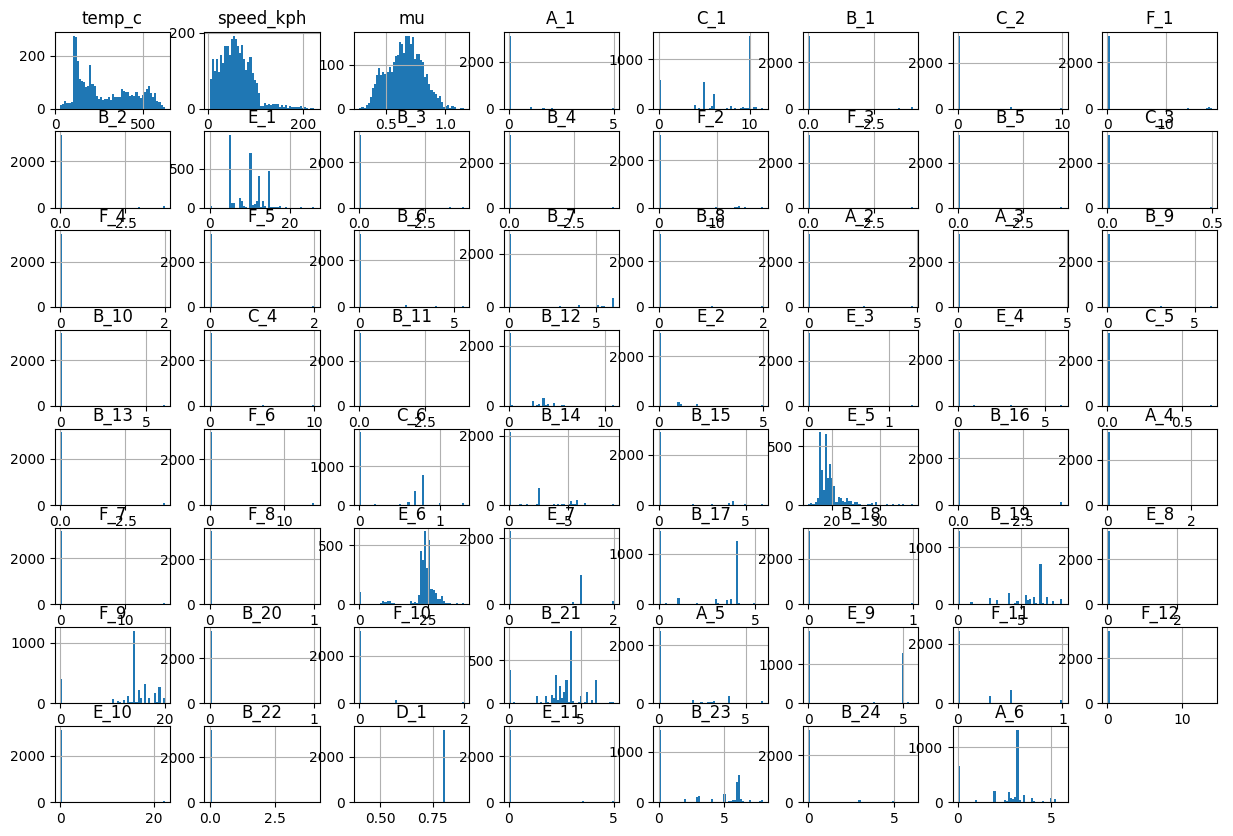

In [ ]:
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
train_set.corr()['mu'].sort_values(ascending = False)

<ipython-input-24-7711a2d78d87>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.corr()['mu'].sort_values(ascending = False)


mu      1.000000
C_6     0.200592
B_7     0.148643
F_11    0.129555
A_5     0.085118
          ...   
A_1    -0.122369
B_23   -0.126618
B_19   -0.141496
E_7    -0.147239
F_10   -0.157575
Name: mu, Length: 63, dtype: float64

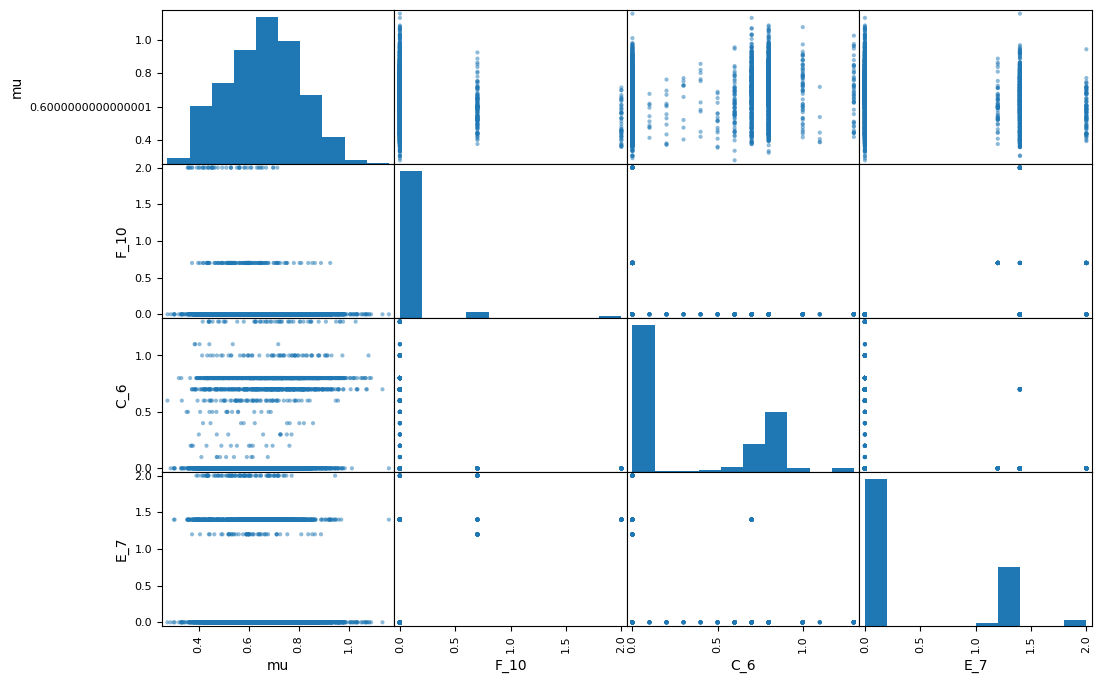

In [ ]:
# Visualize correlations
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ['mu', 'F_10', 'C_6', 'E_7']
scatter_matrix(train_set[attributes], figsize=(12, 8))
plt.show()

In [ ]:
# Check the categories in the braking_id
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
bp_cat_1hot = cat_encoder.fit_transform(train_set[['braking_id']])
print(cat_encoder.categories_)
print('number of categories =', len(cat_encoder.categories_[0]))

[array(['burnishing_1_1', 'burnishing_1_10', 'burnishing_1_11',
       'burnishing_1_12', 'burnishing_1_13', 'burnishing_1_14',
       'burnishing_1_15', 'burnishing_1_16', 'burnishing_1_17',
       'burnishing_1_2', 'burnishing_1_3', 'burnishing_1_4',
       'burnishing_1_5', 'burnishing_1_6', 'burnishing_1_7',
       'burnishing_1_8', 'burnishing_1_9', 'burnishing_2_1',
       'burnishing_2_2', 'burnishing_2_3', 'burnishing_2_4',
       'burnishing_2_5', 'characteristic_1_1', 'characteristic_1_2',
       'characteristic_1_3', 'characteristic_2_1', 'characteristic_2_2',
       'characteristic_2_3', 'characteristic_3_1', 'characteristic_3_2',
       'characteristic_3_3', 'characteristic_4_1', 'characteristic_4_2',
       'characteristic_4_3', 'characteristic_5_1', 'characteristic_5_2',
       'characteristic_5_3', 'characteristic_6_1', 'characteristic_6_2',
       'characteristic_6_3', 'characteristic_7_1', 'characteristic_7_2',
       'characteristic_7_3', 'deceleration_series_1_1',
 

In [ ]:
# Dropping braking_id because it is eating up too much ram
train_set = train_set.drop('braking_id', axis = 1)
test_set = test_set.drop('braking_id', axis = 1)

In [ ]:
# check mu again
train_set['mu'].describe()

count    3238.000000
mean        0.659907
std         0.145983
min         0.275765
25%         0.555202
50%         0.666903
75%         0.764245
max         1.160810
Name: mu, dtype: float64

In [ ]:
# check mu again
test_set['mu'].describe()

count    324.000000
mean       0.671033
std        0.142703
min        0.354804
25%        0.569221
50%        0.673629
75%        0.777513
max        1.088428
Name: mu, dtype: float64

In [ ]:
# Separate and store inputs and labels
bp_train_inputs = train_set.drop("mu", axis = 1)
bp_train_labels = train_set["mu"].copy()
bp_test_inputs = test_set.drop("mu", axis = 1)
bp_test_labels = test_set["mu"].copy()

In [ ]:
print("bp_train_inputs.shape =", bp_train_inputs.shape)
print("bp_train_labels.shape =", bp_train_labels.shape)
print("bp_test_inputs.shape  =", bp_test_inputs.shape)
print("bp_test_labels.shape  =", bp_test_labels.shape)

bp_train_inputs.shape = (3238, 62)
bp_train_labels.shape = (3238,)
bp_test_inputs.shape  = (324, 62)
bp_test_labels.shape  = (324,)


In [ ]:
# Using a pipeline to scale the data and encode categorical data.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = ['temp_c', 'speed_kph', 'A_1', 'C_1', 'B_1', 'C_2', 'F_1', 'B_2',
               'E_1', 'B_3', 'B_4', 'F_2', 'F_3', 'B_5', 'C_3', 'F_4', 'F_5',
               'B_6', 'B_7', 'B_8', 'A_2', 'A_3', 'B_9', 'B_10', 'C_4', 'B_11',
               'B_12', 'E_2', 'E_3', 'E_4', 'C_5', 'B_13', 'F_6', 'C_6', 'B_14',
               'B_15', 'E_5', 'B_16', 'A_4', 'F_7', 'F_8', 'E_6', 'E_7', 'B_17',
               'B_18', 'B_19', 'E_8', 'F_9', 'B_20', 'F_10', 'B_21', 'A_5',
               'E_9', 'F_11', 'F_12', 'E_10', 'B_22', 'D_1', 'E_11', 'B_23',
               'B_24', 'A_6']
# cat_attribs = ['braking_id']

num_pipeline = Pipeline([("standardize", StandardScaler())])

# cat_pipeline = Pipeline([("oneHot", OneHotEncoder())])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    # ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
# fit() calculates the parameters such as median, and transform() fits the
# data and scales the dataset based on the fit calculations
bp_train_prepared_inputs = preprocessing.fit_transform(bp_train_inputs)
# transforms the test set based on the parameters got from the train set
bp_test_prepared_inputs = preprocessing.transform(bp_test_inputs)

In [ ]:
# LinearRegression
from sklearn.linear_model import LinearRegression
# Construct a LinearRegression object with default constructor
lin_reg = LinearRegression()
# x = bp_train_prepared_inputs, y = bp_train_labels
lin_reg.fit(bp_train_prepared_inputs, bp_train_labels)

LinearRegression()

In [ ]:
# LinearRegression Evaluation
from sklearn.metrics import mean_squared_error
# Predictions
bp_train_predictions = lin_reg.predict(bp_train_prepared_inputs)

lin_train_rmse = mean_squared_error(bp_train_labels, bp_train_predictions,
                                    squared=False)

bp_test_predictions = lin_reg.predict(bp_test_prepared_inputs)
lin_test_rmse = mean_squared_error(bp_test_labels, bp_test_predictions,
                                   squared=False)
print('linear train RMSE =', lin_train_rmse)
print('linear test RMSE =', lin_test_rmse)
# the difference is minimal
difference = abs(lin_test_rmse - lin_train_rmse)
print('difference =', difference)
print('percentage of difference =',
      str(difference/ min(lin_test_rmse, lin_train_rmse) * 100),
      '% < 5%')
print('test RMSE approximately equals to train RMSE, thus not overfitting')

linear train RMSE = 0.13338883878548655
linear test RMSE = 0.1332384056095932
difference = 0.00015043317589333305
percentage of difference = 0.11290526571904715 % < 5%
test RMSE approximately equals to train RMSE, thus not overfitting


In [ ]:
# Predict one single mu from the first row in prepared test inputs
print('LinearRegression preditiction on 1 test data:')
print('prediction:', lin_reg.predict([bp_test_prepared_inputs[0]])[0])
print('label/actual data:', bp_test_labels[0])

LinearRegression preditiction on 1 test data:
prediction: 0.7116360884202162
label/actual data: 0.825513473921932


In [ ]:
# LinearRegression 2nd degree polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# features
poly_features_2nd = PolynomialFeatures(degree=2, include_bias=False)
# prepare inputs
bp_train_prepared_2nd = poly_features_2nd.fit_transform(
    bp_train_prepared_inputs)
bp_test_prepared_2nd = poly_features_2nd.fit_transform(
    bp_test_prepared_inputs)
# fit the model
poly_2nd = LinearRegression()
poly_2nd.fit(bp_train_prepared_2nd, bp_train_labels)

LinearRegression()

In [ ]:
# LinearRegression 2nd Degree Polynomial Evaluation
# making predictions on the inputs from the train_set
bp_2nd_train_predictions = poly_2nd.predict(bp_train_prepared_2nd)
# compare
bp_2nd_train_rmse = mean_squared_error(bp_train_labels,
                                       bp_2nd_train_predictions,
                                       squared = False)
# making predictions on the inputs from the test_set
bp_2nd_test_predictions = poly_2nd.predict(bp_test_prepared_2nd)
# compare
bp_2nd_test_rmse = mean_squared_error(bp_test_labels,
                                      bp_2nd_test_predictions,
                                      squared = False)
print('2nd degree polynomial train RMSE =', bp_2nd_train_rmse)
print('2nd degree polynomial test RMSE =', bp_2nd_test_rmse)
# the difference is minimal
difference = abs(bp_2nd_test_rmse - bp_2nd_train_rmse)
print('difference =', difference)
print('percentage of difference =',
      str(difference/ min(bp_2nd_test_rmse, bp_2nd_train_rmse) * 100),
      '% > 5%')
print('Not Overfitting')

2nd degree polynomial train RMSE = 0.11408822025455306
2nd degree polynomial test RMSE = 0.1314663080242756
difference = 0.01737808776972255
percentage of difference = 15.232149060567906 % > 5%
Not Overfitting


In [ ]:
# Using ElasticNet to solve the overfitting problem no longer needed
# after dropping braking_id
# from sklearn.linear_model import ElasticNet
# # Fit
# elastic_net_2nd = ElasticNet(alpha=0.8, l1_ratio=0.37)
# elastic_net_2nd.fit(bp_train_prepared_2nd, bp_train_labels)
# # Prediction on train
# bp_2nd_train_elastic_net_predictions = elastic_net_2nd.predict(
#     bp_train_prepared_2nd)
# bp_2nd_train_elastic_net_rmse = mean_squared_error(
#     bp_train_labels,
#     bp_2nd_train_elastic_net_predictions,
#     squared=False)
# # Prediction on test
# bp_2nd_test_elastic_net_predictions = elastic_net_2nd.predict(
#     bp_test_prepared_2nd)
# bp_2nd_test_elastic_net_rmse = mean_squared_error(
#     bp_test_labels,
#     bp_2nd_test_elastic_net_predictions,
#     squared=False)
# # Compare
# print('2nd degree polynomial train RMSE using ElasticNet =',
#       bp_2nd_train_elastic_net_rmse)
# print('2nd degree polynomial test RMSE using ElasticNet =',
#       bp_2nd_test_elastic_net_rmse)
# difference = abs(bp_2nd_test_elastic_net_rmse - bp_2nd_train_elastic_net_rmse)
# print('difference =', difference)
# print('percentage of error =',
#       str(difference / min(bp_2nd_test_elastic_net_rmse,
#                           bp_2nd_train_elastic_net_rmse) * 100),
#       '% < 5%')
# print('No longer overfitting')

In [ ]:
# Predict one single mu from the first row in prepared test inputs
print('2nd degree polynomial preditiction on 1 test data:')
print('prediction:', poly_2nd.predict([bp_test_prepared_2nd[0]])[0])
print('label/actual data:', bp_test_labels[0])

2nd degree polynomial preditiction on 1 test data:
prediction: 0.8489341735839844
label/actual data: 0.825513473921932


In [ ]:
# LinearRegression 3rd degree polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# features
poly_features_3rd = PolynomialFeatures(degree=3, include_bias=False)
# prepare inputs
bp_train_prepared_3rd = poly_features_3rd.fit_transform(
    bp_train_prepared_inputs)
bp_test_prepared_3rd = poly_features_3rd.fit_transform(
    bp_test_prepared_inputs)
# fit the model (1m 38s)
poly_3rd = LinearRegression()
poly_3rd.fit(bp_train_prepared_3rd, bp_train_labels)

LinearRegression()

In [ ]:
# LinearRegression 3rd Degree Polynomial Evaluation
# making predictions on the inputs from the train_set
bp_3rd_train_predictions = poly_3rd.predict(bp_train_prepared_3rd)
# compare
bp_3rd_train_rmse = mean_squared_error(bp_train_labels,
                                       bp_3rd_train_predictions,
                                       squared = False)
# making predictions on the inputs from the test_set
bp_3rd_test_predictions = poly_3rd.predict(bp_test_prepared_3rd)
# compare
bp_3rd_test_rmse = mean_squared_error(bp_test_labels,
                                      bp_3rd_test_predictions,
                                      squared = False)
print('3rd degree polynomial train RMSE =', bp_3rd_train_rmse)
print('3rd degree polynomial test RMSE =', bp_3rd_test_rmse)
# the difference is minimal
difference = abs(bp_3rd_test_rmse - bp_3rd_train_rmse)
print('difference =', difference)
print('percentage of difference =',
      str(difference / max(bp_3rd_test_rmse, bp_3rd_train_rmse) * 100),
      '% > 5%')
print('Overfitting')

3rd degree polynomial train RMSE = 0.09836909056520653
3rd degree polynomial test RMSE = 0.176830515273472
difference = 0.07846142470826546
percentage of difference = 44.37097555640964 % > 5%
Overfitting


In [ ]:
# Using ElasticNet to solve the overfitting problem
from sklearn.linear_model import ElasticNet
# Fit
elastic_net_3rd = ElasticNet(alpha=0.8, l1_ratio=0.37)
elastic_net_3rd.fit(bp_train_prepared_3rd, bp_train_labels)
# Prediction on train
bp_3rd_train_elastic_net_predictions = elastic_net_3rd.predict(
    bp_train_prepared_3rd)
bp_3rd_train_elastic_net_rmse = mean_squared_error(
    bp_train_labels,
    bp_3rd_train_elastic_net_predictions,
    squared=False)
# Prediction on test
bp_3rd_test_elastic_net_predictions = elastic_net_3rd.predict(
    bp_test_prepared_3rd)
bp_3rd_test_elastic_net_rmse = mean_squared_error(
    bp_test_labels,
    bp_3rd_test_elastic_net_predictions,
    squared=False)
# Compare
print('3rd degree polynomial train RMSE using ElasticNet =',
      bp_3rd_train_elastic_net_rmse)
print('3rd degree polynomial test RMSE using ElasticNet =',
      bp_3rd_test_elastic_net_rmse)
difference = abs(bp_3rd_test_elastic_net_rmse - bp_3rd_train_elastic_net_rmse)
print('difference =', difference)
print('percentage of difference =',
      str(difference / min(bp_3rd_test_elastic_net_rmse,
                          bp_3rd_train_elastic_net_rmse) * 100),
      '% < 5%')
print('No longer overfitting')

3rd degree polynomial train RMSE using ElasticNet = 0.14353061238542683
3rd degree polynomial test RMSE using ElasticNet = 0.14277410786023137
difference = 0.0007565045251954616
percentage of difference = 0.5298611467676206 % < 5%
No longer overfitting


In [ ]:
# Predict one single mu from the first row in prepared test inputs
print('3rd degree polynomial ElasticNet preditiction on 1 test data:')
print('prediction:',
      elastic_net_3rd.predict([bp_test_prepared_3rd[0]])[0])
print('label/actual data:', bp_test_labels[0])

3rd degree polynomial ElasticNet preditiction on 1 test data:
prediction: 0.6616495689969483
label/actual data: 0.825513473921932


In [ ]:
# LinearSVR
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
# Construct a LeanrSVR object with default constructor
lin_reg = LinearSVR(C = 0.95)
# x = bp_train_prepared_inputs, y = bp_train_labels
lin_reg.fit(bp_train_prepared_inputs, bp_train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(C=0.95)

In [ ]:
# LinearSCR Evaluation
bp_train_predictions = lin_reg.predict(bp_train_prepared_inputs)

lin_train_rmse = mean_squared_error(bp_train_labels, bp_train_predictions,
                                    squared=False)

bp_test_predictions = lin_reg.predict(bp_test_prepared_inputs)
lin_test_rmse = mean_squared_error(bp_test_labels, bp_test_predictions,
                                   squared=False)
print('linear train RMSE =', lin_train_rmse)
print('linear test RMSE =', lin_test_rmse)
# the difference is minimal
difference = abs(lin_test_rmse - lin_train_rmse)
print('difference =', difference)
print('percentage of difference =',
      str(difference/ max(lin_test_rmse, lin_train_rmse) * 100),
      '%; not overfitting')

linear train RMSE = 0.14206923062576537
linear test RMSE = 0.14079578722052177
difference = 0.0012734434052436017
percentage of difference = 0.8963541223067993 %; not overfitting


In [ ]:
# Predict one single mu from the first row in prepared test inputs
print('linear SVR preditiction on 1 test data:')
print('prediction:', lin_reg.predict([bp_test_prepared_inputs[0]])[0])
print('label/actual data:', bp_test_labels[0])

linear SVR preditiction on 1 test data:
prediction: 0.7022733596671815
label/actual data: 0.825513473921932


In [ ]:
# 2nd degree polynomial
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# fit the model
poly_2nd = SVR(kernel="poly", degree=2, C=0.9)
poly_2nd.fit(bp_train_prepared_inputs, bp_train_labels)

SVR(C=0.9, degree=2, kernel='poly')

In [ ]:
# SVR 2nd Degree Polynomial Evaluation
# making predictions on the inputs from the train_set
bp_2nd_train_predictions = poly_2nd.predict(bp_train_prepared_inputs)
# compare
bp_2nd_train_rmse = mean_squared_error(bp_train_labels,
                                       bp_2nd_train_predictions,
                                       squared = False)
# making predictions on the inputs from the test_set
bp_2nd_test_predictions = poly_2nd.predict(bp_test_prepared_inputs)
# compare
bp_2nd_test_rmse = mean_squared_error(bp_test_labels,
                                      bp_2nd_test_predictions,
                                      squared = False)
print('2nd degree polynomial train RMSE =', bp_2nd_train_rmse)
print('2nd degree polynomial test RMSE =', bp_2nd_test_rmse)
# the difference is minimal
difference = abs(bp_2nd_test_rmse - bp_2nd_train_rmse)
print('difference =', difference)
print('percentage of difference =',
      str(difference/ max(bp_2nd_test_rmse, bp_2nd_train_rmse) * 100),
      '% > 5%')
print('Not Overfitting.')

2nd degree polynomial train RMSE = 0.12028018799232365
2nd degree polynomial test RMSE = 0.1328081044979344
difference = 0.012527916505610748
percentage of difference = 9.433096385925452 % > 5%
Not Overfitting.


In [ ]:
# Predict one single mu from the first row in prepared test inputs
print('2nd degree SVR preditiction on 1 test data:')
print('prediction:', poly_2nd.predict([bp_test_prepared_inputs[0]])[0])
print('label/actual data:', bp_test_labels[0])

2nd degree SVR preditiction on 1 test data:
prediction: 0.7575542223470368
label/actual data: 0.825513473921932


In [ ]:
# 3rd degree polynomial
# fit the model
poly_3rd = SVR(kernel="poly", degree=3, C=0.85)
poly_3rd.fit(bp_train_prepared_inputs, bp_train_labels)

SVR(C=0.85, kernel='poly')

In [ ]:
# SVR 3rd Degree Polynomial Evaluation
# making predictions on the inputs from the train_set
bp_3rd_train_predictions = poly_3rd.predict(bp_train_prepared_inputs)
# compare
bp_3rd_train_rmse = mean_squared_error(bp_train_labels,
                                       bp_3rd_train_predictions,
                                       squared = False)
# making predictions on the inputs from the test_set
bp_3rd_test_predictions = poly_3rd.predict(bp_test_prepared_inputs)
# compare
bp_3rd_test_rmse = mean_squared_error(bp_test_labels,
                                      bp_3rd_test_predictions,
                                      squared = False)
print('3rd degree polynomial train RMSE =', bp_3rd_train_rmse)
print('3rd degree polynomial test RMSE =', bp_3rd_test_rmse)
# the difference is minimal
difference = abs(bp_3rd_test_rmse - bp_3rd_train_rmse)
print('difference =', difference)
print('percentage of difference =',
      str(difference/ max(bp_3rd_test_rmse, bp_3rd_train_rmse) * 100),
      '% > 5%')
print('Not Overfitting.')

3rd degree polynomial train RMSE = 0.11987288998253025
3rd degree polynomial test RMSE = 0.13348457120022394
difference = 0.013611681217693697
percentage of difference = 10.197194398801695 % > 5%
Not Overfitting.


In [ ]:
# Predict one single mu from the first row in prepared test inputs
print('3rd degree SVR preditiction on 1 test data:')
print('prediction:', poly_3rd.predict([bp_test_prepared_inputs[0]])[0])
print('label/actual data:', bp_test_labels[0])

3rd degree SVR preditiction on 1 test data:
prediction: 0.7373354063773672
label/actual data: 0.825513473921932


In [ ]:
# Model training and testing
from sklearn.tree import DecisionTreeRegressor
# Construct the regressor
tree_reg = DecisionTreeRegressor(max_leaf_nodes = 100, random_state=10)
# x = le_train_prepared_inputs, y = le_train_labels
tree_reg.fit(bp_train_prepared_inputs, bp_train_labels)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=10)

In [ ]:
pd.DataFrame(bp_train_prepared_inputs)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.777229,-0.795220,-0.172531,0.863696,-0.164062,-0.139996,5.910467,-0.176946,-1.161072,-0.104331,...,1.174573,-0.511407,-0.06099,-0.196694,-0.052794,0.058736,-0.168661,1.047541,-0.214362,0.488427
1,-1.124780,0.381802,-0.172531,-1.797306,-0.164062,-0.139996,-0.183874,-0.176946,2.034025,-0.104331,...,-0.861110,-0.511407,-0.06099,-0.196694,-0.052794,0.058736,4.796100,-1.053220,-0.214362,-1.048867
2,1.174028,0.192021,1.869339,-0.466805,-0.164062,-0.139996,-0.183874,-0.176946,0.613982,-0.104331,...,-0.861110,-0.511407,-0.06099,-0.196694,-0.052794,0.058736,-0.168661,0.909786,-0.214362,-1.747637
3,1.181669,0.683647,-0.172531,0.863696,-0.164062,-0.139996,-0.183874,-0.176946,-1.161072,-0.104331,...,1.174573,-0.511407,-0.06099,-0.196694,-0.052794,0.058736,-0.168661,-0.364446,5.320751,-1.747637
4,0.431968,-0.190627,-0.172531,-0.466805,-0.164062,-0.139996,-0.183874,-0.176946,1.374719,-0.104331,...,-0.861110,-0.511407,-0.06099,-0.196694,-0.052794,0.058736,-0.168661,0.324328,-0.214362,-0.350097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,-1.072031,-0.648095,-0.172531,0.863696,-0.164062,-0.139996,-0.183874,-0.176946,0.106824,-0.104331,...,-0.861110,-0.511407,-0.06099,-0.196694,-0.052794,0.058736,-0.168661,-1.053220,-0.214362,1.047443
3234,1.157008,-0.948434,-0.172531,-0.466805,-0.164062,-0.139996,-0.183874,-0.176946,1.374719,-0.104331,...,-0.861110,-0.511407,-0.06099,-0.196694,-0.052794,0.058736,-0.168661,0.324328,-0.214362,-0.350097
3235,-1.092115,1.467197,-0.172531,0.863696,-0.164062,-0.139996,-0.183874,-0.176946,-1.161072,-0.104331,...,1.174573,-0.511407,-0.06099,-0.196694,-0.052794,0.058736,-0.168661,1.047541,-0.214362,0.488427
3236,-0.500029,-0.107309,-0.172531,-0.493415,-0.164062,-0.139996,-0.183874,-0.176946,0.588624,-0.104331,...,-0.861110,-0.511407,-0.06099,-0.196694,-0.052794,0.058736,-0.168661,1.047541,-0.214362,0.488427


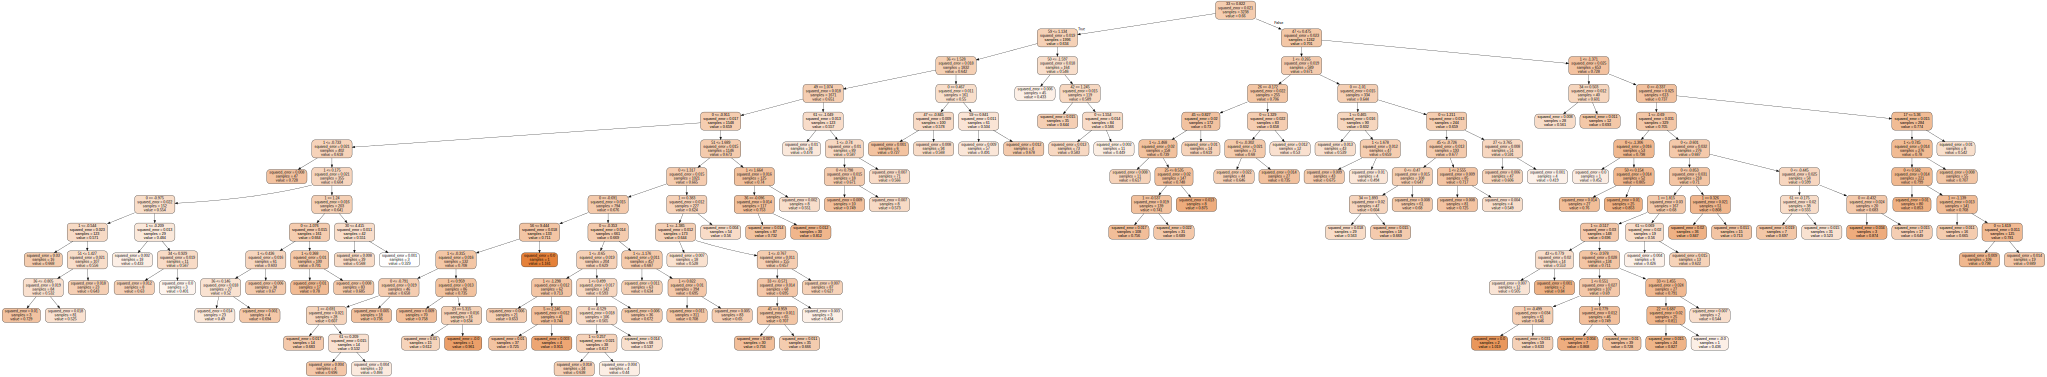

In [ ]:
# Visualization
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_reg,
    out_file = str("bp_regression_tree.dot"),
    # generate feature names to be used in the following visualization
    feature_names = range(62),
    rounded=True,
    filled=True
)
Source.from_file("bp_regression_tree.dot")

In [ ]:
# Testing decision tree model
# Predictions on train
bp_tree_train_predictions = tree_reg.predict(bp_train_prepared_inputs)
# Get rmse from actual train labels to trained predictions outputs
tree_train_rmse = mean_squared_error(
        bp_train_labels,
        bp_train_predictions,
        squared=False
)
# Prediction on test
bp_tree_test_predictions = tree_reg.predict(bp_test_prepared_inputs)
# Get rmse from actual test labels to test predictions outputs
tree_test_rmse = mean_squared_error(
        bp_test_labels,
        bp_tree_test_predictions,
        squared=False
)
# Compare RMSE
print('Decision tree train RMSE =', tree_train_rmse)
print('Decision tree test RMSE =', tree_test_rmse)
# the difference is huge
difference = abs(tree_test_rmse - tree_train_rmse)
print('difference =', difference)
print('percentage of difference =',
      str(difference / max(tree_train_rmse,
                           tree_test_rmse) * 100),
      '% > 5%')
print('Not Overfitting')

Decision tree train RMSE = 0.13338883878548655
Decision tree test RMSE = 0.12710281667546053
difference = 0.006286022110026018
percentage of difference = 4.71255478888686 % > 5%
Not Overfitting


In [ ]:
# Predict one single mu from the first row in prepared test inputs
print('Decision tree preditiction on 1 test data:')
print('prediction:', tree_reg.predict([bp_test_prepared_inputs[0]])[0])
print('label/actual data:', bp_test_labels[0])

Decision tree preditiction on 1 test data:
prediction: 0.8525354777672659
label/actual data: 0.825513473921932


In [ ]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# default bagging bootstrap = True; set it to False for pasting
# n_job: number of jobs in parallel. -1 means use all the cores available.
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
# x = le_train_prepared_inputs, y = le_train_labels
rnd_reg.fit(bp_train_prepared_inputs, bp_train_labels)

RandomForestRegressor(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                      random_state=42)

In [ ]:
# Testing RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Predictions on train
bp_rnd_train_predictions = rnd_reg.predict(bp_train_prepared_inputs)
# Get rmse from actual train labels to trained predictions outputs
rnd_train_rmse = mean_squared_error(
        bp_train_labels,
        bp_rnd_train_predictions,
        squared=False
)
# Prediction on test
bp_rnd_test_predictions = rnd_reg.predict(bp_test_prepared_inputs)
# Get rmse from actual test labels to test predictions outputs
rnd_test_rmse = mean_squared_error(
        bp_test_labels,
        bp_rnd_test_predictions,
        squared=False
)
# Compare RMSE
print('RandomForestRegressor train RMSE =', rnd_train_rmse)
print('RandomForestRegressor test RMSE =', rnd_test_rmse)
# the difference is huge
difference = abs(rnd_test_rmse - rnd_train_rmse)
print('difference =', difference)
print('percentage of difference =',
      difference / max(rnd_train_rmse, rnd_test_rmse) * 100,
      '% < 5 %')
print('Not overfitting')

RandomForestRegressor train RMSE = 0.12449281699520712
RandomForestRegressor test RMSE = 0.12722046665068493
difference = 0.0027276496554778096
percentage of difference = 2.1440336820703876 % < 5 %
Not overfitting


In [ ]:
# Feature importance
for score, name in zip(
        rnd_reg.feature_importances_,
        preprocessing.get_feature_names_out()):
    print(round(score, 2), name)

0.2 num__temp_c
0.18 num__speed_kph
0.03 num__A_1
0.01 num__C_1
0.0 num__B_1
0.0 num__C_2
0.0 num__F_1
0.0 num__B_2
0.0 num__E_1
0.0 num__B_3
0.0 num__B_4
0.0 num__F_2
0.0 num__F_3
0.0 num__B_5
0.0 num__C_3
0.0 num__F_4
0.0 num__F_5
0.0 num__B_6
0.0 num__B_7
0.0 num__B_8
0.0 num__A_2
0.0 num__A_3
0.0 num__B_9
0.0 num__B_10
0.0 num__C_4
0.0 num__B_11
0.01 num__B_12
0.01 num__E_2
0.0 num__E_3
0.0 num__E_4
0.0 num__C_5
0.0 num__B_13
0.0 num__F_6
0.2 num__C_6
0.0 num__B_14
0.0 num__B_15
0.08 num__E_5
0.0 num__B_16
0.0 num__A_4
0.0 num__F_7
0.0 num__F_8
0.0 num__E_6
0.0 num__E_7
0.0 num__B_17
0.0 num__B_18
0.01 num__B_19
0.0 num__E_8
0.06 num__F_9
0.0 num__B_20
0.03 num__F_10
0.05 num__B_21
0.01 num__A_5
0.0 num__E_9
0.02 num__F_11
0.0 num__F_12
0.0 num__E_10
0.0 num__B_22
0.0 num__D_1
0.0 num__E_11
0.08 num__B_23
0.0 num__B_24
0.02 num__A_6


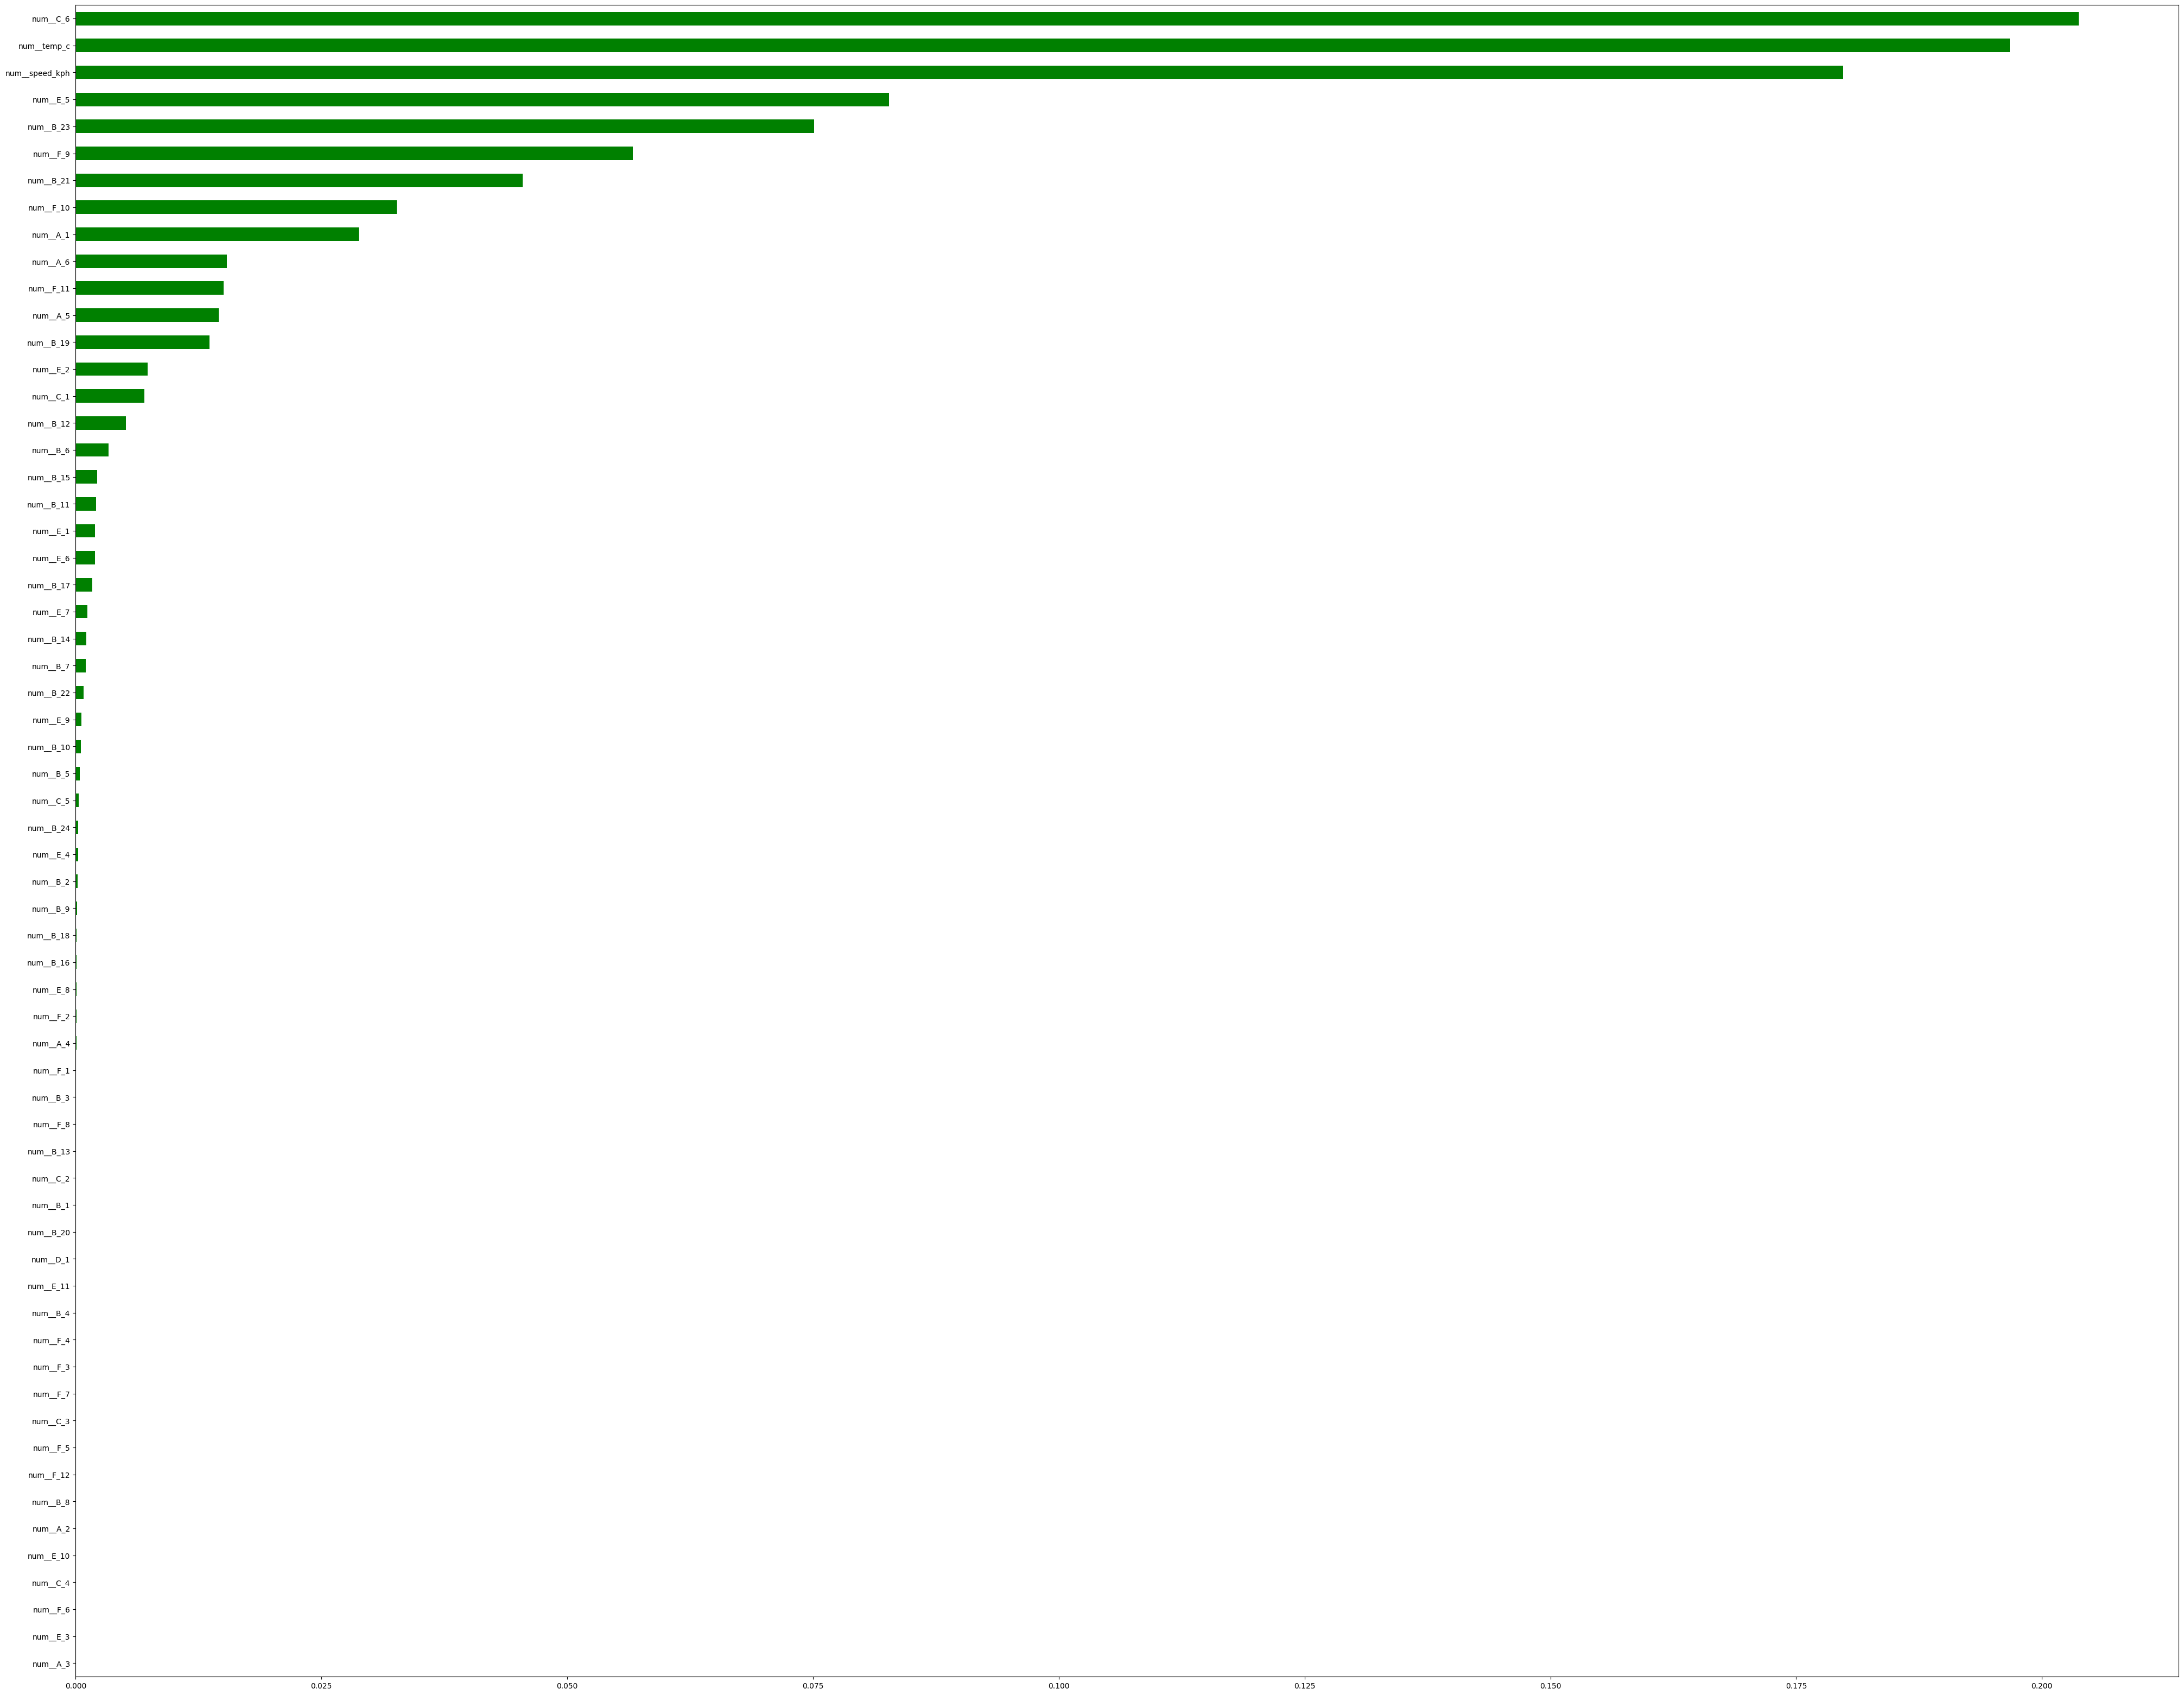

In [ ]:
pd.Series(
    rnd_reg.feature_importances_,
    preprocessing.get_feature_names_out()
    ).sort_values(ascending = True).plot.barh(
        color = 'green',
        figsize = (50, 40)
        ).get_figure().savefig('feature_importance.png')

In [ ]:
pd.DataFrame(
    rnd_reg.feature_importances_,
    preprocessing.get_feature_names_out()
    ).sort_values(0, ascending = False)

,0
num__C_6,0.203729
num__temp_c,0.196701
num__speed_kph,0.179760
num__E_5,0.082717
num__B_23,0.075102
...,...
num__F_5,0.000000
num__F_4,0.000000
num__C_3,0.000000
num__F_3,0.000000


In [ ]:
# Predict one single mu from the first row in prepared test inputs
print('Random Forest preditiction on 1 test data:')
print('prediction:', rnd_reg.predict([bp_test_prepared_inputs[0]])[0])
print('label/actual data:', bp_test_labels[0])

Random Forest preditiction on 1 test data:
prediction: 0.7758155089464924
label/actual data: 0.825513473921932
